# GRIP APR21 @SPARKS FOUNDATION¶¶

Data science and business analytics

TASK1:PREDICTION USING SUPERVISED ML TASK OBJECTIVE:TO PREDICT THE NO OF STUDENT BASED ON STUDY HOURS.

CREATED BY SUSHIL GAUTAM


# Importing all the required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and reading the dataset

In [4]:
url="http://bit.ly/w-data"
data= pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Displaying the data 

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Analysis

In [6]:
data.shape

(25, 2)

In [7]:
data.size

50

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Correlation Coefficient

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Null values

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Conclusion:There is no null values in the data

# Plotting the distrubution of scores

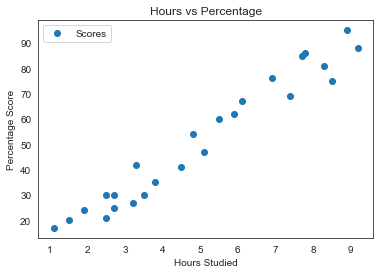

In [12]:
data.plot(x= 'Hours' ,y= 'Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show() 

# Preparing the Data

In [13]:
x= data.iloc[:, :-1].values 
y= data.iloc[:, 1].values

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the entire dataset into train and test set

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)



# Training the model

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("--------Model Trained-------")

--------Model Trained-------


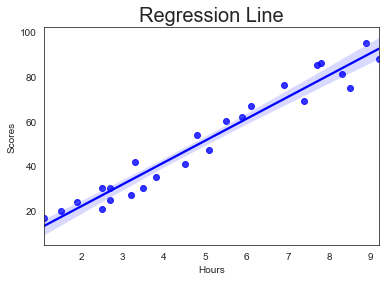

In [18]:
sns.set_style("white")
sns.regplot(data.Hours,data.Scores,color="blue")
plt.title("Regression Line",size=20)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [18]:
print("Co-efficient ",regressor.coef_)
print("Intercept " ,regressor.intercept_)

Co-efficient  [9.67107504]
Intercept  3.3436414413187094


# Predicting the output

In [19]:
predictions= regressor.predict(x_test)
print(predictions)

[74.90959672 70.0740592  46.86347911 37.19240407 62.33719917]


# Comparing Actual vs Predicted

In [20]:
df = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df

,Actual,Predicted
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


# Evaluating the model

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5.91084430646127
MSE: 35.57857659233009
RMSE: 5.96477800025534


# PREDICTING THE SCORE

In [22]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No. of hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of hours = 9.25
Predicted Score = 92.80108554200021
